In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats.mstats import kruskalwallis
import seaborn as sns
import re
import warnings; warnings.simplefilter('ignore')

In [2]:
import os
current=r"D:\Master_data\result_size50"
os.chdir(current)
Filename=os.listdir(current)


In [3]:
def delnoise(data,threshold,n):
    df = pd.read_csv(data)
    Area=df['Area'].tolist()
    counts=df["Area"].value_counts()
    t=tuple(counts.index[counts.values>1])
    clear=[e for e in Area if e not in t]

    Feret=[]
    for i in range(len(clear)):
        if clear[i] in  Area :
            Feret.append(df['Feret'][i])
       
    return Feret

In [4]:
def plastic_count(Feret):
    a=b=c=d=e=f=g=0
    for i in Feret:
        if i<25:
            a+=1
        elif 50>i>=25:
            b+=1
        elif 75>i>=50:
            c+=1
        elif 100>i>=75:
            d+=1
        elif 200>i>=100:
            e+=1
        elif 300>i>=200:
            f+=1
        elif i>=300:
            g+=1
    #print(a,b,c,d,e,f,g)
    temp=pd.DataFrame([{"count":len(Feret),"<25um":a,"25-50um":b,"50-75um":c,"75-100um":d,"100-200um":e,"200-300um":f,">300um":g}])
    return temp

In [5]:
def re_name(string):
    a=string.replace('TEST',"")
    regex = re.compile(r'[A-Z]\w+')
    match=regex.search(a)
    return match.group()

### name Feret Type三個欄位

In [6]:
Size=pd.DataFrame(columns = ["name","Feret","Type"])
for i in Filename:
    temp=pd.DataFrame(columns = ["name","Feret"])
    name=i.split('.')[0]
    name=name.split("TEST")[1]
    name=name.split("_")[0]
    temp['Feret']=delnoise(i,10,6)
    temp['name']=name
    temp['Type']=range(len(temp['Feret']))
    for i in range(len(temp['Feret'])):
        if temp['Feret'][i]<25:
            temp['Type'][i]="<25um"
        elif 50>temp['Feret'][i]>=25:
            temp['Type'][i]="25-50um"
        elif 75>temp['Feret'][i]>=50:
            temp['Type'][i]="50-75um"
        elif 100>temp['Feret'][i]>=75:
            temp['Type'][i]="75-100um"
        elif 200>temp['Feret'][i]>=100:
            temp['Type'][i]="100-200um"
        elif 300>temp['Feret'][i]>=200:
            temp['Type'][i]="200-300um"
        elif temp['Feret'][i]>=300:
            temp['Type'][i]=">300um"
    Size=pd.concat([Size, temp], ignore_index=True,sort=True)
Size=Size[['name',"Feret","Type"]]

In [7]:
#Size.to_excel(r'D:\Master_data\Size_1.xlsx')

### 各類別有幾個分屬不同欄

In [7]:
Finally=pd.DataFrame(columns = ["name","count", "<25um","25-50um","50-75um","75-100um","100-200um","200-300um"])
for i in Filename:
    name=i.split('.')[0]
    result=plastic_count(delnoise(i,10,6))
    result['name']=name
    Finally=pd.concat([Finally, result], ignore_index=True,sort=True)
Finally = Finally[['name',"count",'<25um','25-50um','50-75um','75-100um','100-200um','200-300um','>300um']]
New_name=[]
for i in Finally['name']:
    name=i.split('_')
    New_name.append(name[0])
Finally['name']=New_name
Finally['Site']=Finally['name'].map(re_name)


In [8]:
Finally


,name,count,<25um,25-50um,50-75um,75-100um,100-200um,200-300um,>300um,Site
0,TEST20200311ANBU,89,20,48,18,2,1,0,0.0,ANBU
1,TEST20200311MHH,86,31,40,13,0,2,0,0.0,MHH
2,TEST20200311QIGU,25,6,16,0,0,1,1,1.0,QIGU
3,TEST20200311TXY,59,38,13,6,1,0,1,0.0,TXY
4,TEST20200311YGC,249,129,86,19,7,7,0,1.0,YGC
...,...,...,...,...,...,...,...,...,...,...
161,TEST20200812WL,124,88,23,5,2,5,0,1.0,WL
162,TEST20200812WT,132,77,41,4,1,8,0,1.0,WT
163,TEST20200812YGC,67,26,21,8,5,3,1,3.0,YGC
164,TEST20200812YGX,72,24,24,14,5,2,3,0.0,YGX


In [9]:
## 輸出
Finally.to_excel('data.xlsx')

### 依日期做計算

In [8]:
Finally.iloc[:,1:8]=Finally.iloc[:,1:8].apply(pd.to_numeric)
target=["count",'<25um','25-50um','50-75um','75-100um','100-200um','200-300um','>300um']
group=round(Finally.groupby(Finally['name'])[target].sum())
#Finally.groupby(Finally['name'])[target].sum()
group

,count,<25um,25-50um,50-75um,75-100um,100-200um,200-300um,>300um
name,,,,,,,,
TEST20200311ANBU,89,20,48,18,2,1,0,0.0
TEST20200311MHH,86,31,40,13,0,2,0,0.0
TEST20200311QIGU,25,6,16,0,0,1,1,1.0
TEST20200311TXY,59,38,13,6,1,0,1,0.0
TEST20200311YGC,249,129,86,19,7,7,0,1.0
...,...,...,...,...,...,...,...,...
TEST20200603TXY,143,105,27,6,1,3,1,0.0
TEST20200603WL,184,33,52,25,12,32,10,20.0
TEST20200603YGC,244,172,51,9,4,6,1,1.0


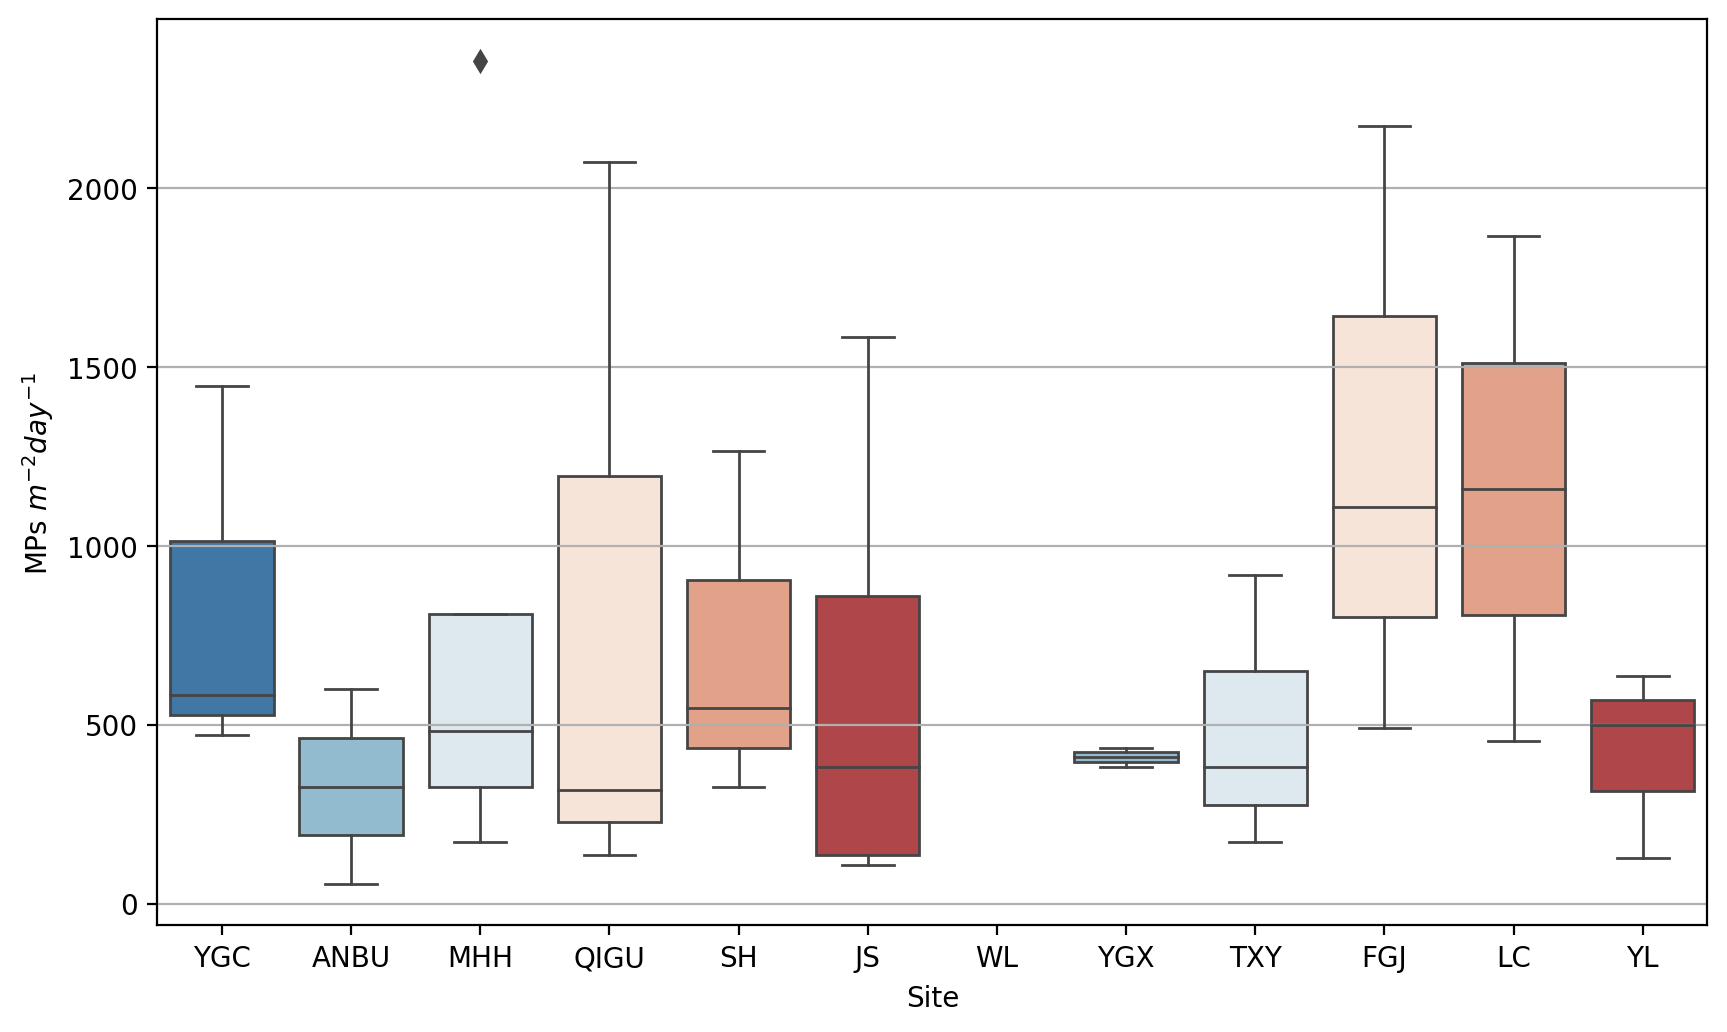

In [11]:
Finally['n/m2/day']=Finally['count']*4/0.0314/14
order=["YGC", "ANBU","MHH","QIGU","SH","JS","WL","YGX","TXY","FGJ","LC","YL"]
plt.figure(figsize=(10,6),dpi=200) 
ax=sns.boxplot(data=Finally,x = 'Site',y = 'n/m2/day', palette=sns.color_palette("RdBu_r", 6) ,order=order,linewidth=1)
ax.set(ylabel=r'MPs $ m^{-2}day^{-1}$')
ax.yaxis.grid(True)
#plt.savefig('boxplot.png')

### 失敗區

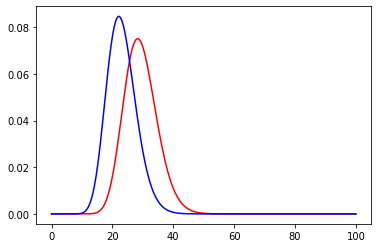

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

mu1 = 29
sig1 = 0.3
mu2 = 23
sig2 = 0.1

x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, mu1, sig1)
y2 = stats.gamma.pdf(x, mu2, sig2)
plt.plot(x, y1, 'r-')
plt.plot(x, y2, 'b-')
#plt.legend()
plt.show()

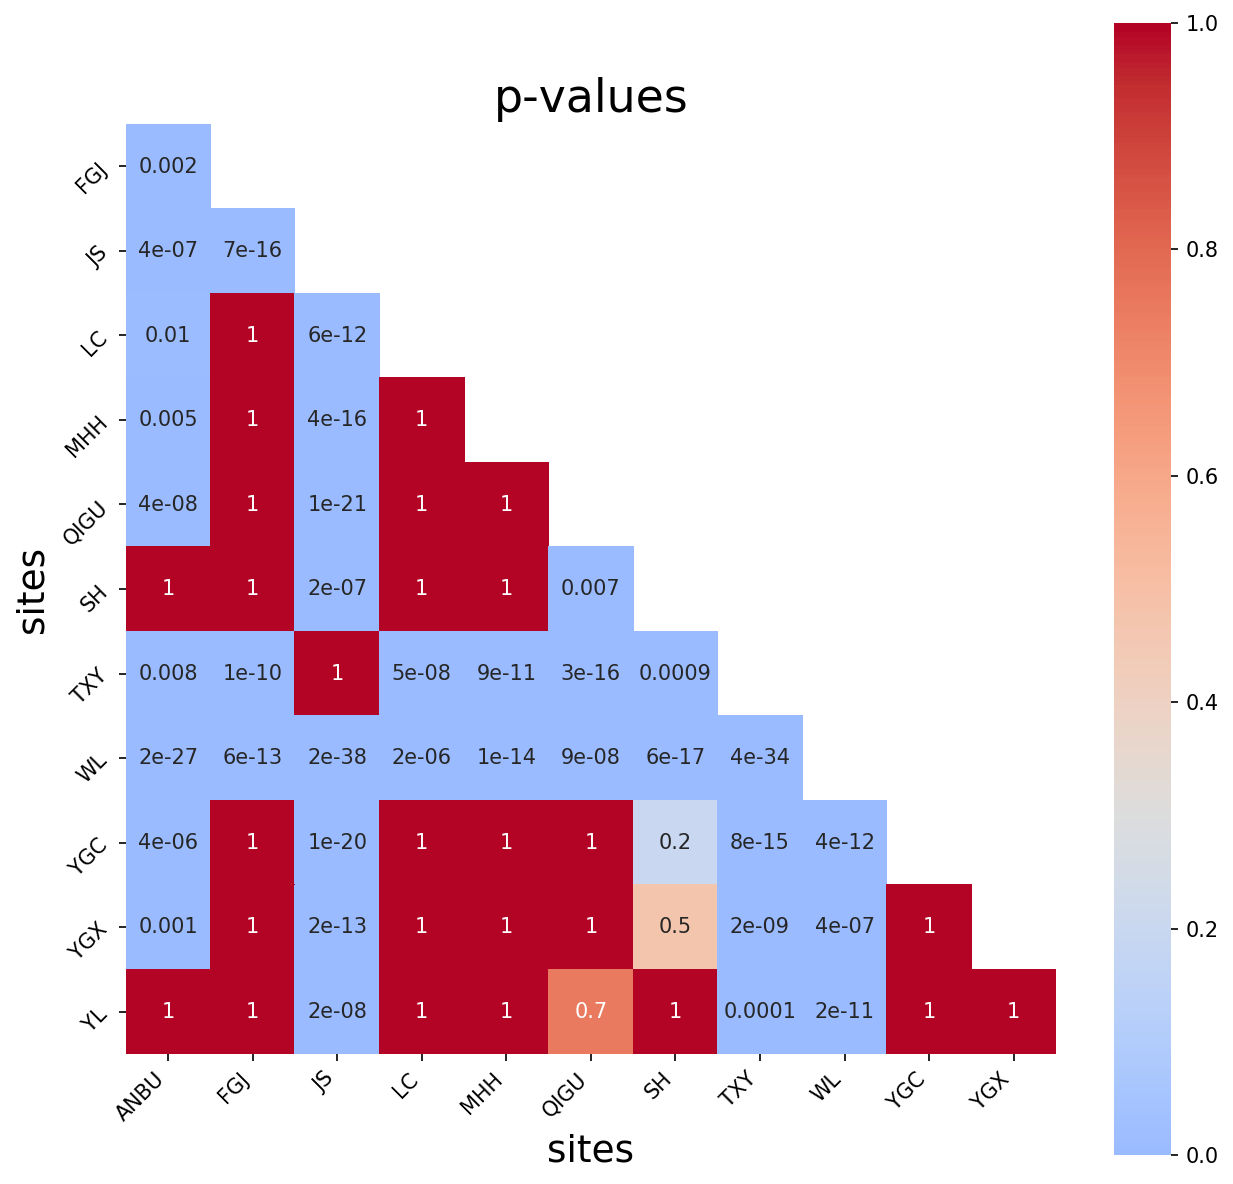

In [2]:

df=pd.read_excel(r"D:\Master\Size.xlsx",index_col='Site')
#df=df.loc[df.Feret < 300]

plt.figure(figsize=(10,10),dpi=150) 
ax =sns.heatmap(df, annot=True,square=True,cmap="coolwarm",fmt ='.1g',center=0.3)

#设置坐标字体方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=45, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.xlabel('sites', fontsize=18)#设置坐标名称
plt.ylabel('sites', fontsize=18)
plt.title('p-values', fontsize=22)#标题
plt.savefig('heatmap_site.png')
plt.show()
